In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
year = input("Enter year ( 16 - 23)")
month = input("Enter month for 2019 (1-12)")

Enter year ( 16 - 23) 16
Enter month for 2019 (1-12) 3


In [3]:
if int(year) > 21:
    pa_th = f"Time series data/fnew-20{year}-{month}.csv"
elif int(year) < 20:
    pa_th = f"Time series data/f 20{year} {month}.csv"
else:
    pa_th = f"Time series data/fNew 20{year} {month}.csv"
pa_th

'Time series data/f 2016 3.csv'

In [48]:
df = pd.read_csv(pa_th)
df

,dtm,f
0,2016-03-01 00:00:00 +0000,50.122
1,2016-03-01 00:00:01 +0000,50.116
2,2016-03-01 00:00:02 +0000,50.110
3,2016-03-01 00:00:03 +0000,50.097
4,2016-03-01 00:00:04 +0000,50.086
...,...,...
2678395,2016-04-01 00:59:55 +0100,50.016
2678396,2016-04-01 00:59:56 +0100,50.017
2678397,2016-04-01 00:59:57 +0100,50.018
2678398,2016-04-01 00:59:58 +0100,50.020


In [5]:
mean_value = df['f'].mean()
std_dev = df['f'].std()
skew_ness = df['f'].skew()
print(mean_value)
print(std_dev)
print(skew_ness)

49.99935163157108
0.05603461541688417
0.1625644514814289


Text(0, 0.5, 'Frequency')

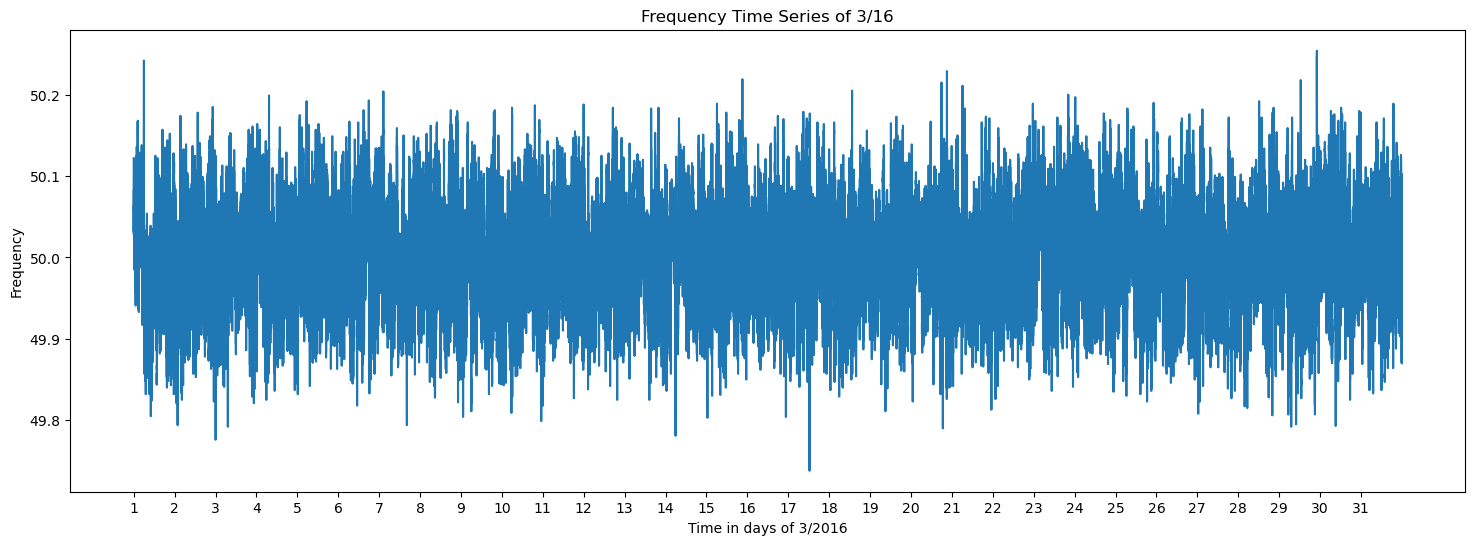

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(df['f'])
plt.xticks(ticks=[i*86400 for i in range(31)], labels=[str(i) for i in range(1, 32)])
plt.title(f'Frequency Time Series of {month}/{year}')
plt.xlabel(f'Time in days of {month}/20{year}')
plt.ylabel('Frequency')

In [7]:
prob_49_9 = (df['f'] < 49.9).mean()
prob_50_1 = (df['f'] > 50.1).mean()

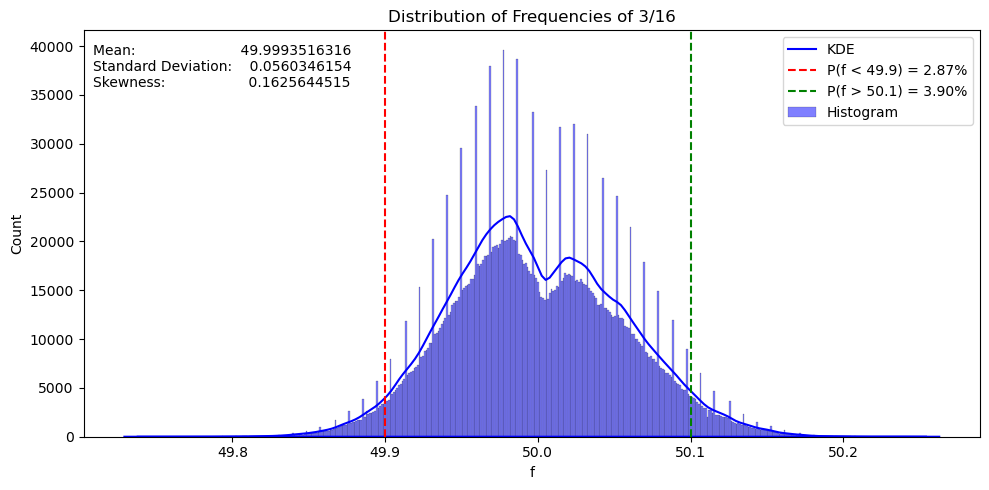

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['f'], kde=True, label='Histogram', color='blue')
sns.kdeplot(df['f'], color='blue', label='KDE')

plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1:.2%}')

plt.fill_between(df['f'], 0, 1, where=(df['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df['f'], 0, 1, where=(df['f'] > 50.1), color='green', alpha=0.2)

plt.text(x=0.01, y=0.94, s=f'Mean:                        {mean_value:.10f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(x=0.01, y=0.90, s=f'Standard Deviation:    {std_dev:.10f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(x=0.01, y=0.86, s=f'Skewness:                   {skew_ness:.10f}', transform=plt.gca().transAxes, fontsize=10)

plt.title(f'Distribution of Frequencies of {month}/{year}')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
Q1 = np.percentile(df['f'], 25)
Q3 = np.percentile(df['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
up_outliers = df[df['f'] > upper_whisker]
low_outliers = df[df['f'] < lower_whisker]
prob_up = len(up_outliers)/len(df)
prob_low = len(low_outliers)/len(df)

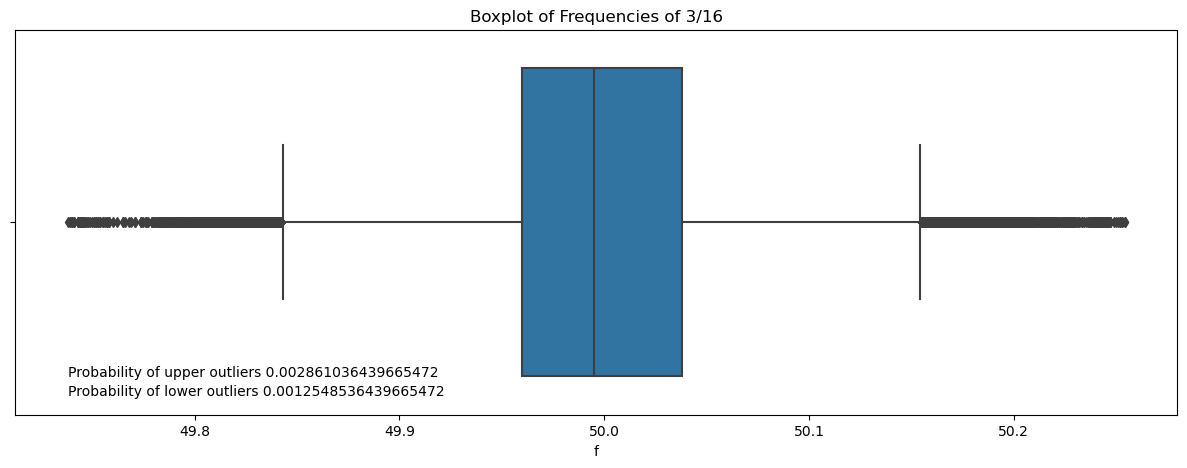

In [10]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['f'])
plt.title(f'Boxplot of Frequencies of {month}/{year}')
plt.text(df['f'].min(),0.4, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df['f'].min(),0.45, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()

In [11]:
df['dtm'] = pd.to_datetime(df['dtm'], utc=True)
df_10min = df.resample('10T', on='dtm').mean()

Text(0, 0.5, 'Average frequency of 10 minute intervals')

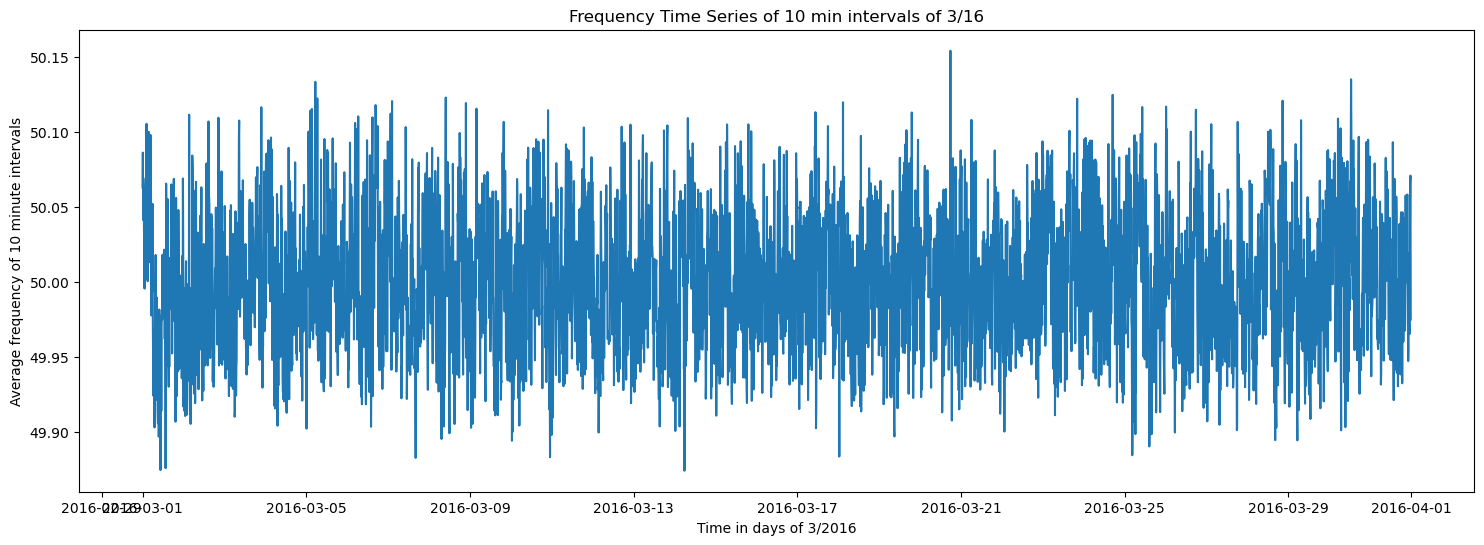

In [12]:
plt.figure(figsize=(18, 6))
plt.plot(df_10min)
plt.title(f'Frequency Time Series of 10 min intervals of {month}/{year}')
plt.xlabel(f'Time in days of {month}/20{year}')
plt.ylabel('Average frequency of 10 minute intervals')

In [13]:
prob_49_9_10min = (df_10min < 49.9).mean()
prob_50_1_10min = (df_10min > 50.1).mean()

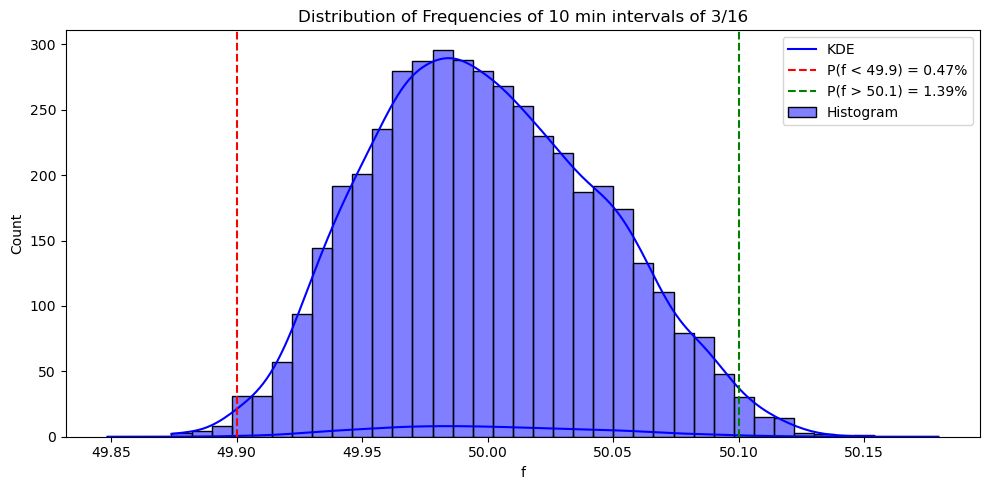

In [14]:
plt.figure(figsize=(10, 5))
prob_49_9_10min = prob_49_9_10min.iloc[0] if isinstance(prob_49_9_10min, pd.Series) else prob_49_9_10min
prob_50_1_10min = prob_50_1_10min.iloc[0] if isinstance(prob_50_1_10min, pd.Series) else prob_50_1_10min

sns.histplot(df_10min['f'], kde=True, label='Histogram', color='blue')
sns.kdeplot(df_10min['f'], color='blue', label='KDE')

plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9_10min:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1_10min:.2%}')

plt.fill_between(df_10min['f'], 0, 1, where=(df_10min['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df_10min['f'], 0, 1, where=(df_10min['f'] > 50.1), color='green', alpha=0.2)

plt.title(f'Distribution of Frequencies of 10 min intervals of {month}/{year}')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
Q1 = np.percentile(df_10min['f'], 25)
Q3 = np.percentile(df_10min['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

up_outliers = df_10min[df_10min['f'] > upper_whisker]
low_outliers = df_10min[df_10min['f'] < lower_whisker]

prob_up = len(up_outliers) / len(df_10min)
prob_low = len(low_outliers) / len(df_10min)

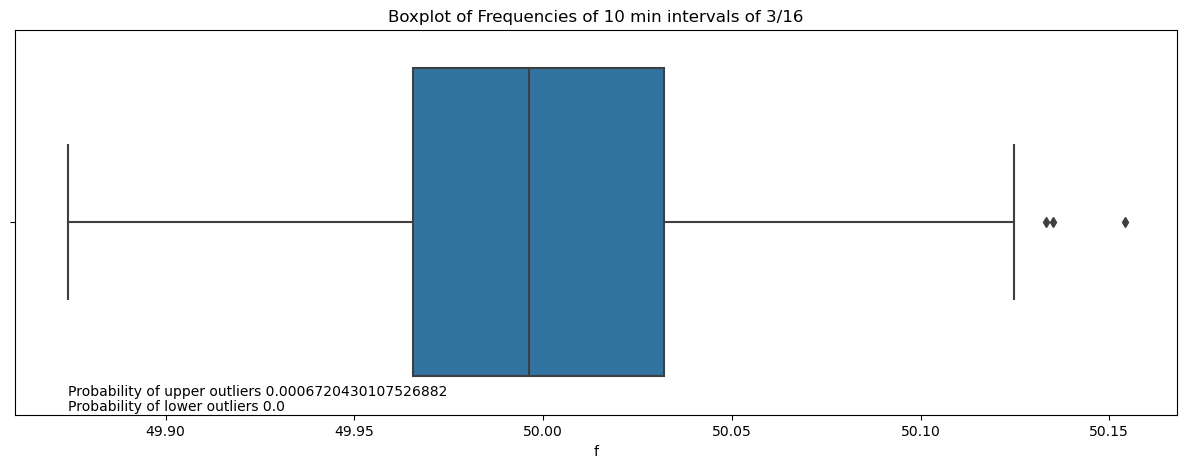

In [16]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_10min['f'])
plt.title(f'Boxplot of Frequencies of 10 min intervals of {month}/{year}')
plt.text(df_10min['f'].min(),0.45, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df_10min['f'].min(),0.49, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()

In [17]:
df_10min['del_f'] = df_10min['f'] - 50

In [18]:
df1_10min = df_10min
e1 = 0.12
cps_ratio = df1_10min['del_f'] * df1_10min['del_f'] / (e1 ** 2)
cps1 = (2 - cps_ratio)*100
cps1 = cps1.to_frame(name='cps')

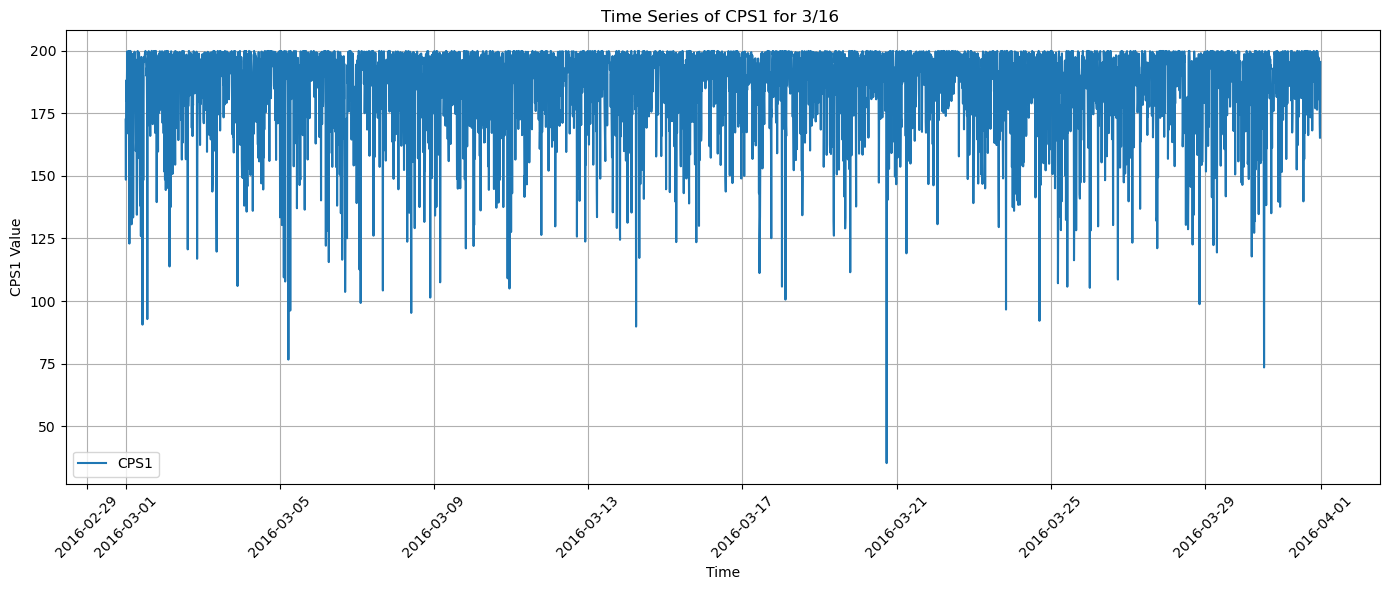

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(cps1.index, cps1, label='CPS1')
plt.title(f'Time Series of CPS1 for {month}/{year} ')
plt.xlabel('Time')
plt.ylabel('CPS1 Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
skew_cps1 = cps1['cps'].skew()
mean_cps1 = cps1['cps'].mean()
std_cps1 = cps1['cps'].std()

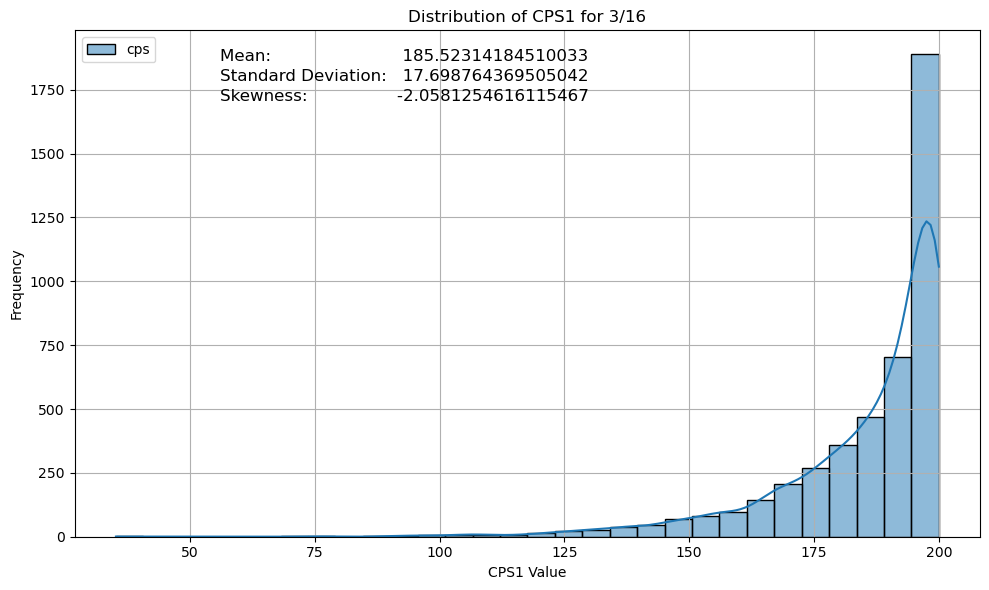

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(cps1, kde=True, bins=30, color='blue')
plt.title(f'Distribution of CPS1 for {month}/{year}')
plt.xlabel('CPS1 Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(x=0.16, y=0.94, s=f'Mean:                         {mean_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.text(x=0.16, y=0.90, s=f'Standard Deviation:   {std_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.text(x=0.16, y=0.86, s=f'Skewness:                 {skew_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
Q1 = np.percentile(cps1['cps'], 25)
Q3 = np.percentile(cps1['cps'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

up_outliers = cps1[cps1['cps'] > upper_whisker]
low_outliers = cps1[cps1['cps'] < lower_whisker]

prob_up = len(up_outliers) / len(cps1)
prob_low = len(low_outliers) / len(cps1)

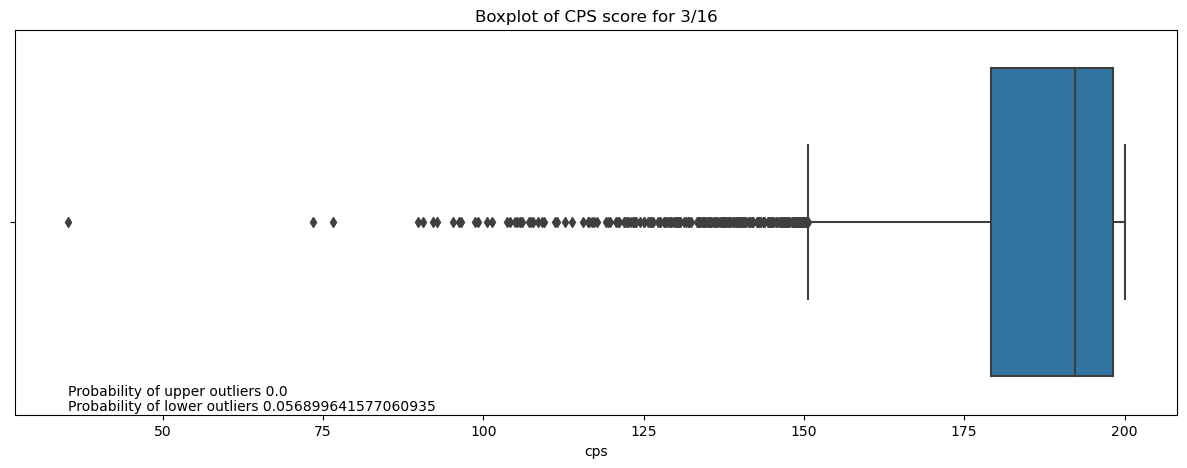

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=cps1['cps'])
plt.title(f'Boxplot of CPS score for {month}/{year}')
plt.text(cps1['cps'].min(),0.45, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(cps1['cps'].min(),0.49, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()